In [1]:
"""
Tugas 1 NLP No. 2
@author 23520050
@reference https://www.kaggle.com/poigal/cnn-on-glove-word-embedding
"""

'\nTugas 1 NLP No. 2\n@author 23520050\n@reference https://www.kaggle.com/poigal/cnn-on-glove-word-embedding\n'

In [2]:
import pandas as pd

In [3]:
# Load GloVe model
GLOVE_PATH = "glove.6B.50d.txt"

def load_word_vectors(path):
    word_vectors = dict()
    f = open(path, encoding="utf-8")
    for line in f:
        values = line.split()
        word = values[0]
        word_numbers = values[1:]
        word_vectors[word] = word_numbers
    f.close()
    print("load {} word vectors.".format(len(word_vectors)))
    return word_vectors

word_vectors = load_word_vectors(GLOVE_PATH)
# word_vectors

load 400000 word vectors.


In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd

PATH = "Data_Train.csv"
def load_split_data(path):
    df = pd.read_csv(path, encoding="cp1252")
    df = df.sample(frac=1).reset_index(drop=True)
    X = df.iloc[:,0]
    Y = df.iloc[:,1]

    X_training, X_validation, Y_training, Y_validation = train_test_split(X, Y, test_size=0.1, random_state=123)
    X_validation, X_test, Y_validation, Y_test = train_test_split(X_validation, Y_validation, test_size=0.5, random_state=123)
    
    return X_training, X_validation, X_test, Y_training, Y_validation, Y_test

X_training, X_validation, X_test, Y_training, Y_validation, Y_test = load_split_data(PATH)


In [45]:
import matplotlib.pyplot as plt
import pickle

labels = [Y_training, Y_validation, Y_test]
titles = ['Train Label', 'Validation Label', 'Test Label']

plt.figure(figsize=(15,4))

#plot train label
ax = plt.subplot(1,3,1)
plt.hist(x=Y_training, bins=15)
plt.title('Train Label Histogram',fontsize=15)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks([0,1,2,3])

#plot validation label
plt.subplot(1,3,2)
plt.hist(x=Y_validation, bins=15)
plt.title('Validation Label Histogram',fontsize=15)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks([0,1,2,3])

#plot test label
plt.subplot(1,3,3)
plt.hist(x=Y_test, bins=15)
plt.title('Test Label Histogram',fontsize=15)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks([0,1,2,3])

pickle.dump(ax, open('myplot.pickle', 'wb'))
plt.close()

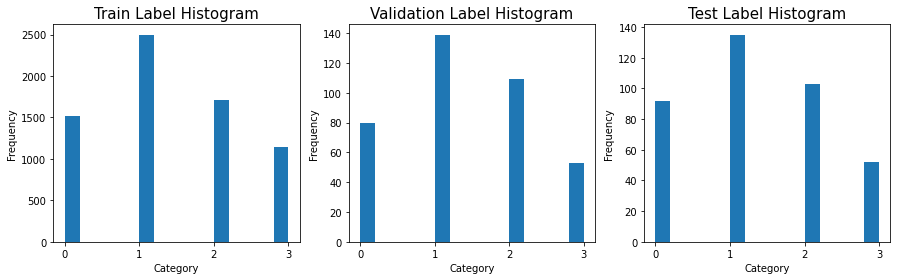

In [46]:
ax = pickle.load(open('myplot.pickle','rb'))
plt.show()

In [5]:
# CNN Implementation imports
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, LSTM, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dropout, Activation, concatenate
from keras.layers.core import Reshape, Flatten
from keras.callbacks import EarlyStopping
from keras.layers.embeddings import Embedding
from keras import regularizers
from keras.optimizers import Adam

# Gensim
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors

import numpy as np

In [6]:
NUM_WORDS = 30000

tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer_train = Tokenizer(num_words=NUM_WORDS)
tokenizer_valid = Tokenizer(num_words=NUM_WORDS)
tokenizer_tests = Tokenizer(num_words=NUM_WORDS)

# Get values from all dataframe
tokenizer.fit_on_texts(pd.read_csv(PATH, encoding="cp1252"))

# Get values from training dataframe
tokenizer_train.fit_on_texts(X_training)

# Get values from validation dataframe
tokenizer_valid.fit_on_texts(X_validation)

# Get values from test dataframe
tokenizer_tests.fit_on_texts(X_test)

# Count unique tokens
word_index = tokenizer.word_index
word_index_train = tokenizer_train.word_index
word_index_valid = tokenizer_valid.word_index
word_index_tests = tokenizer_tests.word_index
print('Found {} unique tokens in training data.'.format(len(word_index_train)))
print('Found {} unique tokens in validation data.'.format(len(word_index_valid)))
print('Found {} unique tokens in test data.'.format(len(word_index_tests)))

Found 36131 unique tokens in training data.
Found 7990 unique tokens in validation data.
Found 7959 unique tokens in test data.


In [7]:
sequences_train = tokenizer_train.texts_to_sequences(X_training)
sequences_valid = tokenizer_valid.texts_to_sequences(X_validation)
sequences_tests = tokenizer_tests.texts_to_sequences(X_test)

In [73]:
# sequences_train
# sequences_valid
# sequences_test
X_train_padded = pad_sequences(sequences_train, maxlen=100)
X_valid_padded = pad_sequences(sequences_valid, maxlen=X_train_padded.shape[1])
X_tests_padded = pad_sequences(sequences_tests, maxlen=X_train_padded.shape[1])
#Y_train_array = np.asarray(Y_training)
#Y_valid_array = np.asarray(Y_validation)

from keras.utils import to_categorical

# Y_train_array = to_categorical(Y_training, 4)
Y_train_array = to_categorical(np.asarray(Y_training))
# Y_valid_array = to_categorical(Y_validation, 4)
Y_valid_array = to_categorical(np.asarray(Y_validation))
Y_tests_array1 = to_categorical(Y_test, 4)
Y_tests_array = to_categorical(np.asarray(Y_test))

print("shape of X train and X validation tensor: {} {}".format(X_train_padded.shape, X_valid_padded.shape))
print("shape of Y train and Y validation tensor: {} {}".format(Y_train_array.shape, Y_valid_array.shape))
print("shape of X tests and Y tests      tensor: {} {}".format(X_tests_padded.shape, Y_tests_array.shape))

shape of X train and X validation tensor: (6865, 100) (381, 100)
shape of Y train and Y validation tensor: (6865, 4) (381, 4)
shape of X tests and Y tests      tensor: (382, 100) (382, 4)


In [74]:
Y_tests_array1

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

In [75]:
Y_tests_array

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

In [54]:
X_training[10]

'Netflix has announced that the third season of Kiefer Sutherland starrer Designated Survivor will premiere on June 7\n\n\nThe political thriller features Sutherland as Tom Kirkman, a low-level Cabinet member who is suddenly catapulted to the position of President of the United States without preparation after a devastating terrorist attack strikes during the State of the Union, killing all those ahead of him in the presidential succession line'

In [55]:
sequences_train[10]

[34,
 137,
 2806,
 1776,
 348,
 274,
 6,
 34,
 120,
 198,
 1776,
 2807,
 11,
 25,
 1776,
 13,
 331,
 8210,
 23,
 865,
 695,
 298,
 345,
 1862,
 2,
 926,
 2,
 23,
 566,
 2888,
 56,
 14909,
 529,
 4,
 1776,
 412,
 207,
 2,
 144,
 1776,
 4,
 653,
 1776,
 678,
 5,
 1213,
 4,
 286,
 1776,
 2807,
 15,
 2095,
 397,
 70,
 797,
 107,
 3450,
 16,
 119,
 4,
 805,
 5315,
 1776,
 168,
 12,
 474,
 2,
 4807,
 2014,
 23,
 682,
 2807,
 3155,
 18,
 8211,
 11,
 1035,
 2889,
 14,
 133,
 14,
 4429,
 23,
 3671,
 2349,
 11,
 10373,
 2807]

In [49]:
word_index_train

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'in': 5,
 'a': 6,
 'is': 7,
 'on': 8,
 'for': 9,
 'that': 10,
 'with': 11,
 'it': 12,
 'has': 13,
 'as': 14,
 'will': 15,
 'from': 16,
 'at': 17,
 'by': 18,
 'be': 19,
 'are': 20,
 'said': 21,
 'have': 22,
 'its': 23,
 'was': 24,
 'this': 25,
 'an': 26,
 'which': 27,
 'not': 28,
 'also': 29,
 'but': 30,
 'he': 31,
 'been': 32,
 'their': 33,
 'new': 34,
 'up': 35,
 'india': 36,
 'year': 37,
 'or': 38,
 'his': 39,
 'more': 40,
 'we': 41,
 'you': 42,
 'bjp': 43,
 'congress': 44,
 'can': 45,
 'about': 46,
 'had': 47,
 'who': 48,
 'one': 49,
 'all': 50,
 'they': 51,
 'party': 52,
 'while': 53,
 '1': 54,
 'after': 55,
 'like': 56,
 'out': 57,
 'two': 58,
 'people': 59,
 'i': 60,
 'time': 61,
 'would': 62,
 'other': 63,
 'when': 64,
 'first': 65,
 'than': 66,
 'were': 67,
 'last': 68,
 'there': 69,
 'over': 70,
 'only': 71,
 '2': 72,
 'so': 73,
 'us': 74,
 'data': 75,
 'if': 76,
 'some': 77,
 'elections': 78,
 'government': 79,
 'market': 80,
 'modi'

In [56]:
X_train_padded[10]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,    34,   137,  2806,  1776,   348,   274,
           6,    34,   120,   198,  1776,  2807,    11,    25,  1776,
          13,   331,  8210,    23,   865,   695,   298,   345,  1862,
           2,   926,     2,    23,   566,  2888,    56, 14909,   529,
           4,  1776,   412,   207,     2,   144,  1776,     4,   653,
        1776,   678,     5,  1213,     4,   286,  1776,  2807,    15,
        2095,   397,    70,   797,   107,  3450,    16,   119,     4,
         805,  5315,  1776,   168,    12,   474,     2,  4807,  2014,
          23,   682,  2807,  3155,    18,  8211,    11,  1035,  2889,
          14,   133,    14,  4429,    23,  3671,  2349,    11, 10373,
        2807])

In [58]:
EMBEDDING_DIM = 50
vocabulary_size=min(len(word_index_train)+1, NUM_WORDS)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))

for word,i in word_index_train.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = np.array(embedding_vector)
    except KeyError:
        vec = np.zeros(EMBEDDING_DIM)
        embedding_matrix[i] = vec

In [59]:
# Define embedding layer
embedding_layer = Embedding(vocabulary_size,
                           EMBEDDING_DIM,
                           weights=[embedding_matrix],
                           trainable=False)
X_train_padded.shape[1]

100

In [60]:
sequence_length = X_train_padded.shape[1]
filter_sizes = [3,4]
num_filters = 100
drop = 0.4

In [61]:
def create_model_1(sequence_length, filter_size, num_filters, drop):
    inputs = Input(shape=(sequence_length,))
    embedding = embedding_layer(inputs)
    reshape = Reshape((sequence_length,EMBEDDING_DIM,1))(embedding)

    conv_0 = Conv2D(num_filters, (filter_sizes[0], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
    conv_1 = Conv2D(num_filters, (filter_sizes[1], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)

    maxpool_0 = MaxPooling2D((sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))(conv_0)
    maxpool_1 = MaxPooling2D((sequence_length - filter_sizes[1] + 1, 1), strides=(1,1))(conv_1)

    merged_tensor = concatenate([maxpool_0, maxpool_1], axis=1)
    flatten = Flatten()(merged_tensor)
    reshape = Reshape((2*num_filters,))(flatten)
    dropout = Dropout(drop)(flatten)
    conc = Dense(40)(dropout)
    output = Dense(units=4, activation='softmax')(conc)

    # this creates a model that includes
    model = Model(inputs, output)
    optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

model = create_model_1(X_train_padded.shape[1], [3,4], 100, 0.4)

In [62]:
def create_model_2(sequence_length, num_classes):
    input = Input(shape=(sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(input)
    cov1 = Conv1D(128, 5, activation='relu')(embedded_sequences)
    pool1 = MaxPooling1D(5)(cov1)
    cov2= Conv1D(128, 5, activation='relu')(pool1)
    pool2 = MaxPooling1D(5)(cov2)
    flat = Flatten()(pool2)
    dense = Dense(128, activation='relu')(flat)
    output = Dense(num_classes, activation='softmax')(dense)
    
    model = Model(input, output)
    optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

model2 = create_model_2(X_train_padded.shape[1], 4)

In [63]:
# Fitting the model.

callbacks = [EarlyStopping(monitor='val_loss')]
hist_adam_1 = model.fit(X_train_padded, Y_train_array, 
                      epochs=10, 
                      validation_data=(X_valid_padded, Y_valid_array))

Epoch 1/10
215/215 [==============================] - 8s 24ms/step - loss: 0.5550 - accuracy: 0.8294 - val_loss: 2.2779 - val_accuracy: 0.2730
Epoch 2/10
215/215 [==============================] - 4s 19ms/step - loss: 0.2480 - accuracy: 0.9447 - val_loss: 2.6619 - val_accuracy: 0.3045
Epoch 3/10
215/215 [==============================] - 4s 20ms/step - loss: 0.2361 - accuracy: 0.9538 - val_loss: 2.6781 - val_accuracy: 0.3018
Epoch 4/10
215/215 [==============================] - 4s 19ms/step - loss: 0.2424 - accuracy: 0.9559 - val_loss: 2.8660 - val_accuracy: 0.2913
Epoch 5/10
215/215 [==============================] - 4s 18ms/step - loss: 0.2356 - accuracy: 0.9555 - val_loss: 3.2135 - val_accuracy: 0.2625
Epoch 6/10
215/215 [==============================] - 4s 19ms/step - loss: 0.2256 - accuracy: 0.9638 - val_loss: 3.1550 - val_accuracy: 0.2572
Epoch 7/10
215/215 [==============================] - 5s 21ms/step - loss: 0.2438 - accuracy: 0.9542 - val_loss: 3.1213 - val_accuracy: 0.2625

In [68]:
hist_adam_2 = model2.fit(X_train_padded, Y_train_array, 
                      epochs=10, 
                      validation_data=(X_valid_padded, Y_valid_array))

Epoch 1/10
215/215 [==============================] - 5s 23ms/step - loss: 0.0050 - accuracy: 0.9974 - val_loss: 5.7513 - val_accuracy: 0.3570
Epoch 2/10
215/215 [==============================] - 4s 18ms/step - loss: 0.0050 - accuracy: 0.9972 - val_loss: 5.7399 - val_accuracy: 0.3543
Epoch 3/10
215/215 [==============================] - 4s 20ms/step - loss: 0.0048 - accuracy: 0.9972 - val_loss: 5.9200 - val_accuracy: 0.3543
Epoch 4/10
215/215 [==============================] - 4s 17ms/step - loss: 0.0047 - accuracy: 0.9977 - val_loss: 6.1438 - val_accuracy: 0.3570
Epoch 5/10
215/215 [==============================] - 4s 18ms/step - loss: 0.0045 - accuracy: 0.9975 - val_loss: 6.1059 - val_accuracy: 0.3517
Epoch 6/10
215/215 [==============================] - 4s 18ms/step - loss: 0.0046 - accuracy: 0.9975 - val_loss: 6.3902 - val_accuracy: 0.3543s - loss: 0.0046 - ac
Epoch 7/10
215/215 [==============================] - 4s 17ms/step - loss: 0.0049 - accuracy: 0.9977 - val_loss: 6.1747 -

In [69]:
train_loss,train_accuracy = model.evaluate(X_train_padded, Y_train_array, verbose=False)
train_loss2,train_accuracy2 = model2.evaluate(X_train_padded, Y_train_array, verbose=False)
print("training accuracy 1: {:.4f}".format(train_accuracy))
print("training accuracy 2: {:.4f}".format(train_accuracy2))

training accuracy 1: 0.9815
training accuracy 2: 0.9978


In [70]:
valid_loss,valid_accuracy = model.evaluate(X_valid_padded, Y_valid_array, verbose=False)
valid_loss2,valid_accuracy2 = model2.evaluate(X_valid_padded, Y_valid_array, verbose=False)
print("validation accuracy 1: {:.4f}".format(valid_accuracy))
print("validation accuracy 2: {:.4f}".format(valid_accuracy2))

validation accuracy 1: 0.2677
validation accuracy 2: 0.3596


In [71]:
test_loss,test_accuracy = model.evaluate(X_tests_padded, Y_tests_array, verbose=False)
test_loss2,test_accuracy2 = model2.evaluate(X_tests_padded, Y_tests_array, verbose=False)
print("test accuracy 1: {:.4f}".format(test_accuracy))
print("test accuracy 2: {:.4f}".format(test_accuracy2))

test accuracy 1: 0.3089
test accuracy 2: 0.3455


In [130]:
sequences_tests

[[6,
  7,
  1146,
  574,
  9,
  980,
  1,
  100,
  24,
  25,
  2356,
  237,
  1,
  3541,
  419,
  17,
  20,
  1,
  166,
  15,
  1,
  467,
  512,
  13,
  2357,
  12,
  3542,
  26,
  1147,
  238,
  4,
  50,
  981,
  1148,
  1149,
  5,
  2358,
  15,
  105,
  15,
  372,
  1731,
  1149,
  12,
  635,
  3543,
  2,
  2,
  2,
  575,
  353,
  139,
  23,
  3544,
  2359,
  221,
  167,
  1732,
  3545,
  5,
  1412,
  468,
  6,
  1,
  1413,
  155,
  303,
  83,
  7,
  84,
  1733,
  192,
  420,
  2360,
  354,
  11,
  44,
  23,
  3546,
  2359,
  221,
  8,
  1734,
  1,
  304],
 [1,
  1150,
  37,
  355,
  421,
  24,
  202,
  9,
  1,
  106,
  193,
  327,
  112,
  9,
  3547,
  3548,
  4,
  1,
  166,
  636,
  21,
  3549,
  2361,
  22,
  28,
  356,
  59,
  134,
  66,
  2362,
  2,
  2,
  3550,
  7,
  637,
  2363,
  3,
  20,
  7,
  193,
  4,
  5,
  7,
  1735,
  1736,
  3,
  168,
  9,
  32,
  29,
  638,
  847,
  1151,
  44,
  18,
  101,
  7,
  513],
 [1,
  117,
  4,
  1,
  92,
  29,
  639,
  27,
  328,
  6,
  1,

In [131]:
# Use model to predict training, validation, and test data
pred_train = model.predict(X_train_padded)
pred_valid = model.predict(X_valid_padded)
pred_tests = model.predict(X_tests_padded)

In [141]:
X_train_padded

array([[    5,    74, 14979, ...,   519,   595,   762],
       [    0,     0,     0, ...,    14,    34,   452],
       [    0,     0,     0, ...,   157,     1,   616],
       ...,
       [  158,     8,   700, ...,    41,    39,   428],
       [   27,   911,    12, ...,   241,   510,   104],
       [    0,     0,     0, ...,   136,  1487,   408]])

In [142]:
pred_train

array([[3.5941601e-04, 2.4092197e-04, 2.1284819e-04, 9.9956095e-01],
       [8.2681775e-03, 9.9845231e-01, 1.9295126e-06, 4.3428242e-03],
       [9.9992621e-01, 9.7509808e-05, 3.7827645e-05, 8.3184242e-04],
       ...,
       [1.6955964e-05, 1.0000000e+00, 3.3340686e-07, 7.8428220e-06],
       [9.9978602e-01, 8.7226028e-05, 1.3768673e-04, 4.4608414e-03],
       [8.4484136e-06, 9.9999976e-01, 8.9550969e-07, 1.4465825e-05]],
      dtype=float32)

In [132]:
X_valid_padded

array([[   0,    0,    0, ...,   11,  161,  290],
       [   0,    0,    0, ...,    1,  336, 3584],
       [1344,  693,   31, ...,    7, 3641, 3642],
       ...,
       [   0,    0,    0, ...,    1, 1204, 1631],
       [   0,    0,    0, ...,    6,  115, 1320],
       [  43,   48, 2455, ...,  208,   91,  435]])

In [133]:
pred_valid

array([[5.8762635e-05, 1.6744336e-01, 3.0630827e-04, 7.8645056e-01],
       [7.8875291e-01, 3.4073710e-01, 6.2874381e-07, 5.0401688e-04],
       [3.7613213e-03, 1.5580356e-03, 1.1409569e-04, 2.7028658e-05],
       ...,
       [5.4874420e-03, 2.5972220e-01, 3.8695335e-03, 1.2269288e-02],
       [9.4880080e-01, 7.4739814e-02, 1.8045306e-04, 1.5208125e-03],
       [1.9177616e-02, 9.2179024e-01, 1.2113878e-04, 1.5629530e-03]],
      dtype=float32)

In [134]:
X_tests_padded

array([[   0,    0,    0, ..., 1734,    1,  304],
       [   0,    0,    0, ...,  101,    7,  513],
       [ 640, 2372,   47, ...,  577,    5, 3575],
       ...,
       [   3, 7817, 7818, ...,    5, 1471,  941],
       [ 238,    8,   50, ...,    4,   77,  651],
       [  21, 7838,  414, ..., 3077,  190,   98]])

In [135]:
pred_tests

array([[9.79595482e-01, 5.40226698e-04, 1.81999860e-06, 1.67548656e-03],
       [1.08459294e-02, 1.06499195e-02, 6.68653846e-03, 5.35113156e-01],
       [9.90430117e-01, 1.59987807e-03, 8.36580992e-04, 5.60472074e-07],
       ...,
       [1.63791031e-01, 3.93302411e-01, 1.36891007e-03, 1.75076893e-05],
       [4.09383574e-05, 9.98152971e-01, 3.08585101e-07, 5.13735414e-03],
       [6.98440373e-02, 4.55912769e-01, 3.12727298e-06, 2.53918245e-07]],
      dtype=float32)

In [136]:
Y_tests_array

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [137]:
# Collect scores
categories = ["0", "1", "2", "3"]
auc = np.zeros((3, 4))
auc

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [139]:
from sklearn import metrics
for i,x in enumerate(categories):
    auc = np.array([
        round(metrics.roc_auc_score(Y_train_array[:,i], pred_train[:,i]), 3),
        round(metrics.roc_auc_score(Y_valid_array[:,i], pred_valid[:,i]), 3),
        round(metrics.roc_auc_score(Y_tests_array[:,i], pred_tests[:,i]), 3),
    ])
    print(x,"Train AUC:",auc[0],", Val AUC:",auc[1],", Test AUC:",auc[2])
    
#avg_auc = auc.mean(axis=1)
#print("Average Train AUC:",avg_auc[0],", Average Val AUC:",avg_auc[1],", Average Test AUC:",avg_auc[2])

0 Train AUC: 1.0 , Val AUC: 0.511 , Test AUC: 0.479
1 Train AUC: 1.0 , Val AUC: 0.495 , Test AUC: 0.514
2 Train AUC: 1.0 , Val AUC: 0.628 , Test AUC: 0.578
3 Train AUC: 1.0 , Val AUC: 0.484 , Test AUC: 0.471
